<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Low_Temperature_Capacitance_Comparison_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authored by Onri Jay Benally (2025)

Open Access (CC-BY-4.0)

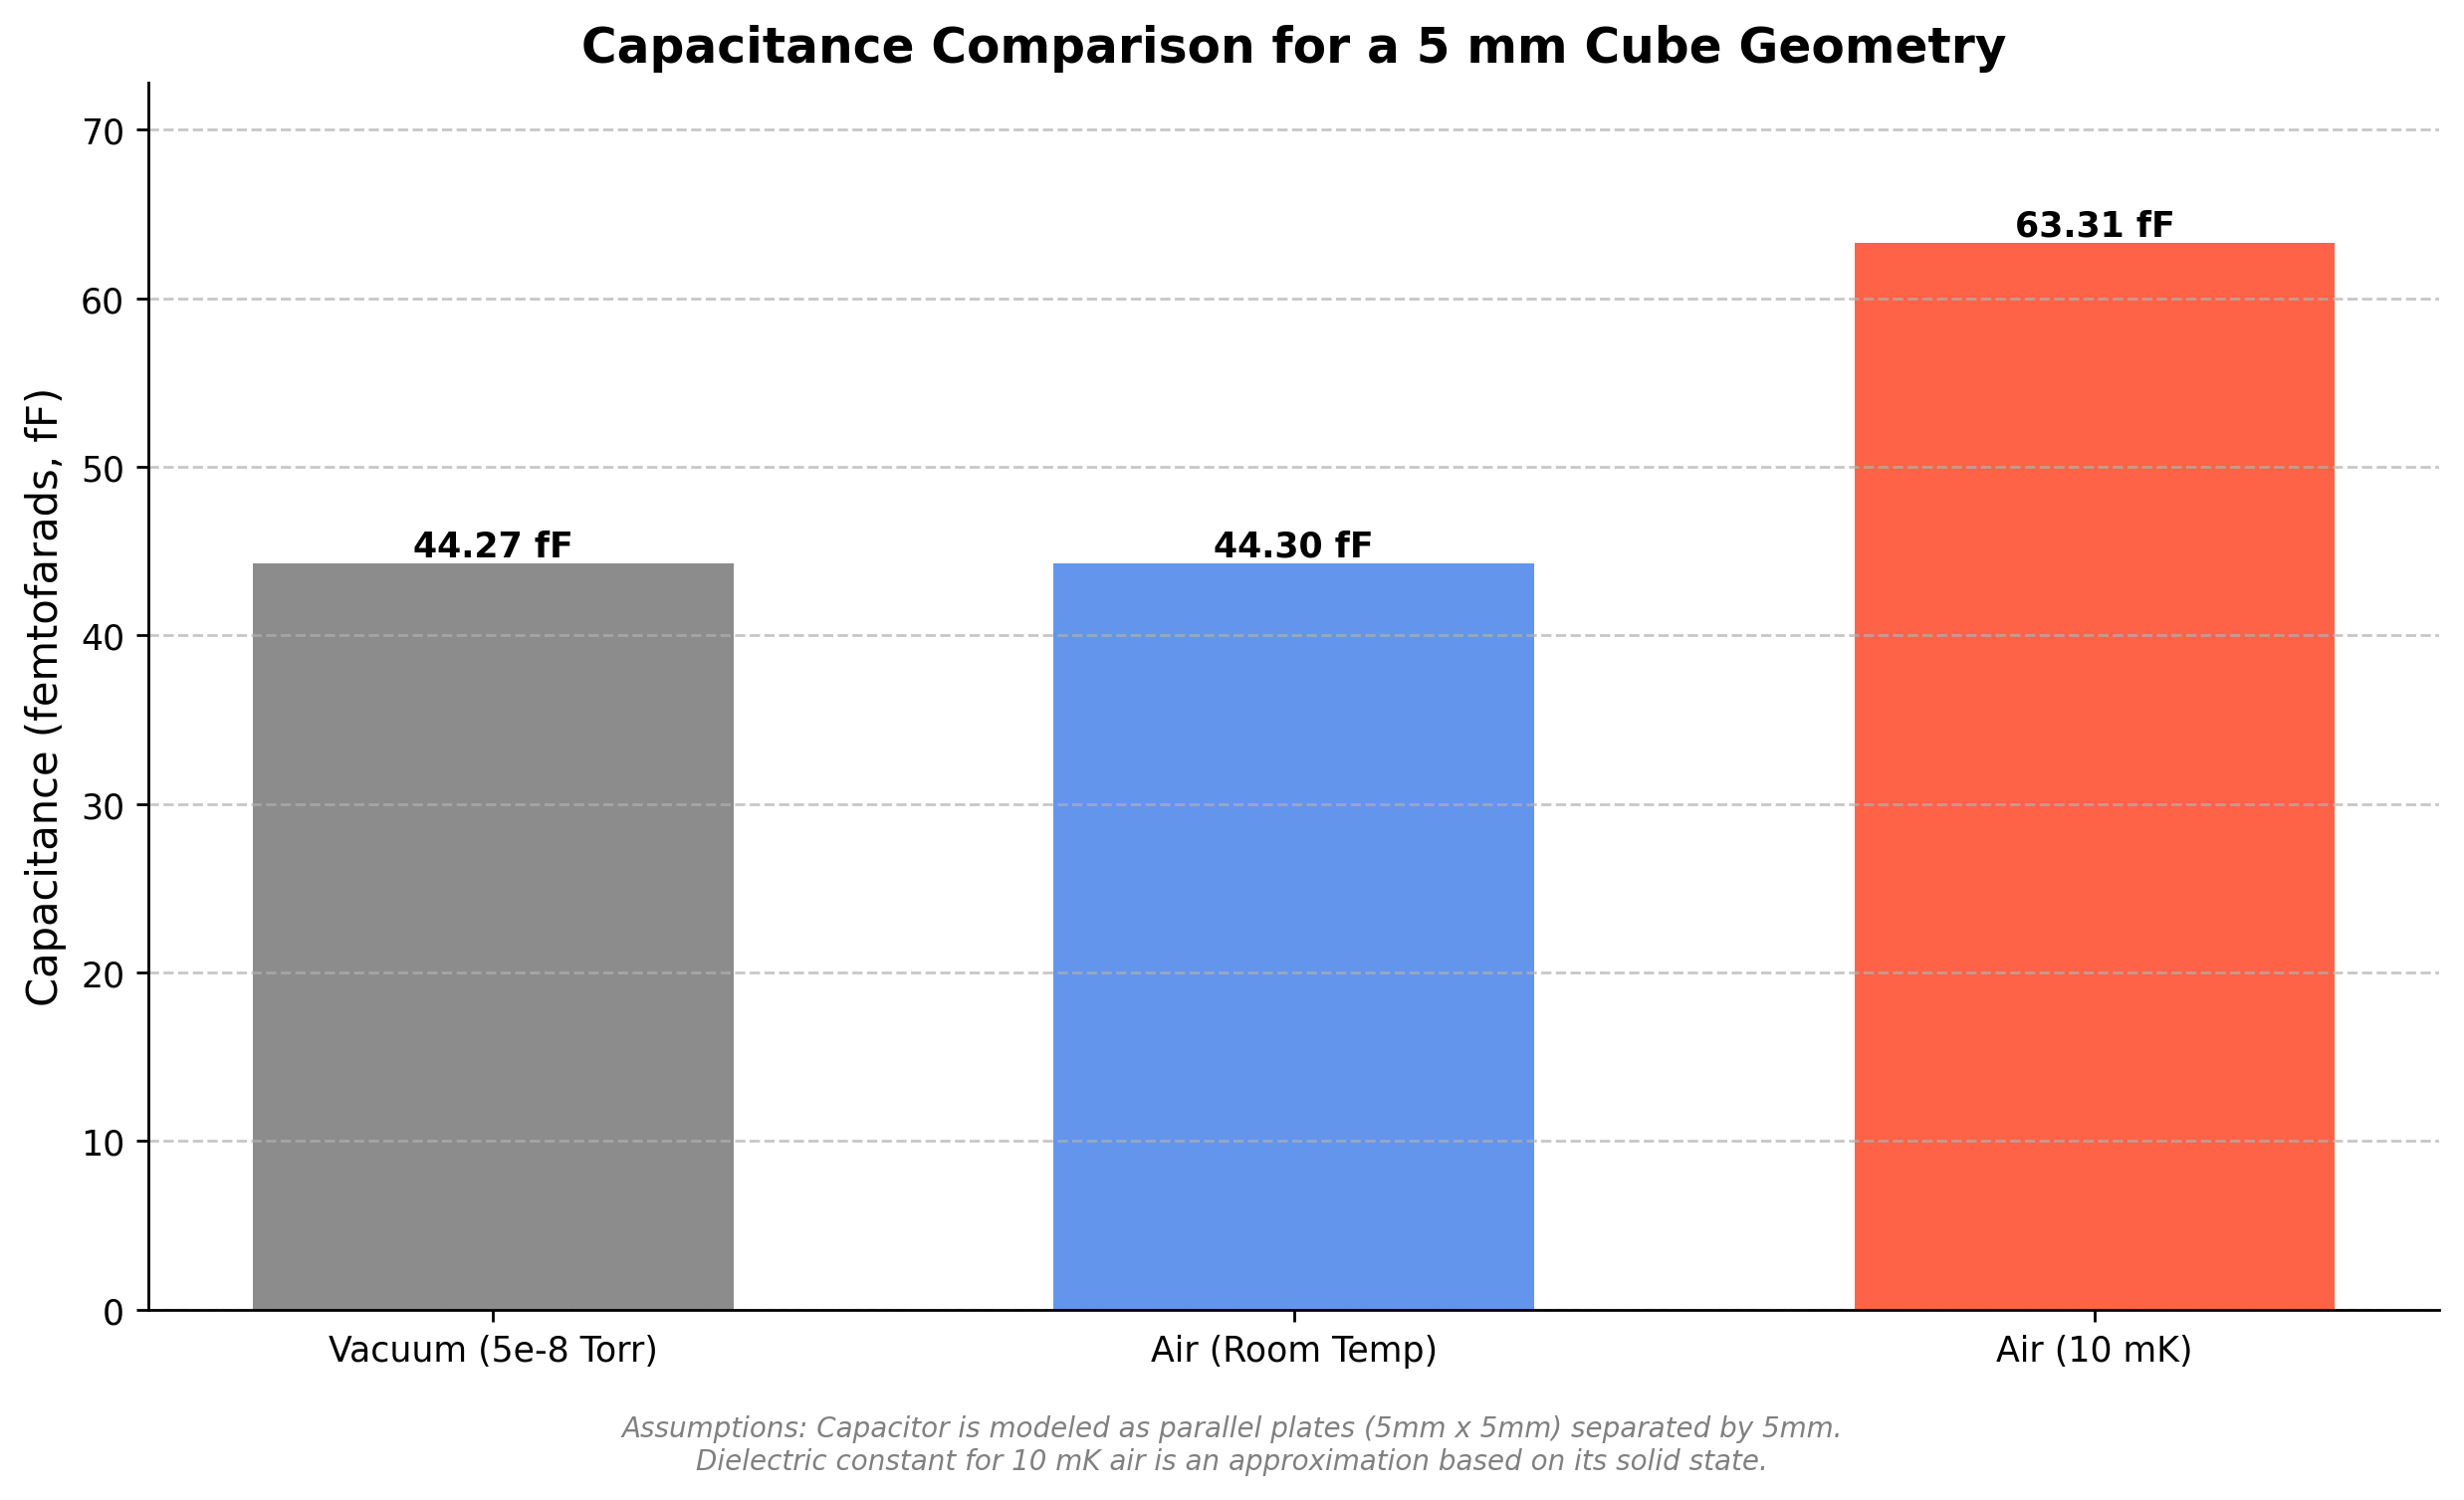

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define Constants & Parameters ---
# Physical constant for the permittivity of free space in Farads per meter.
epsilon_0 = 8.854e-12

# We model the "5 mm volume" as a cube, which implies a parallel plate capacitor
# where the plate sides and the distance between them are all 5 mm.
side_length = 5e-3     # 5 mm converted to meters
area = side_length**2  # Area of plates in square meters
distance = side_length # Distance between plates in meters

# --- 2. Define Dielectric Constants (Relative Permittivity) ---
# These values are based on standard physics data and physical state estimations.
# - Vacuum: By definition, the relative permittivity is 1. A pressure of 5e-8 Torr
#   is a high vacuum, so its dielectric constant is negligibly different from 1.0.
# - Ambient Air: A standard accepted value for air at ~1 atm and 20°C.
# - 10 mK Air: At this extremely low temperature, air is a solid. We use an
#   approximate value for solid air, which is similar to that of solid nitrogen.
dielectric_constants = {
    'Vacuum (5e-8 Torr)': 1.0,
    'Air (Room Temp)': 1.00058,
    'Air (10 mK)': 1.43
}

# --- 3. Calculate Capacitance for Each Condition ---
# The formula for capacitance is C = e_r * (e_0 * A / d), where e_r is the
# relative permittivity (the dielectric constant).
capacitance_values = {}
for condition, e_r in dielectric_constants.items():
    # Calculate capacitance in Farads
    capacitance_F = e_r * (epsilon_0 * area / distance)
    # Convert to femtofarads (1 Farad = 1e15 femtofarads) for easier reading
    capacitance_fF = capacitance_F * 1e15
    capacitance_values[condition] = capacitance_fF

# --- 4. Generate the Plot ---
# Get the labels and corresponding values for the bar chart.
labels = list(capacitance_values.keys())
values = list(capacitance_values.values())

# Create the figure and axes for the plot.
# The DPI is set to 250 as requested.
fig, ax = plt.subplots(figsize=(10, 6), dpi=250)

# Define colors for the bars to make the distinction clear.
colors = ['#8c8c8c', '#6495ed', '#ff6347'] # Grey for vacuum, blue for air, red for cold
bars = ax.bar(labels, values, color=colors, width=0.6)

# Add text labels on top of each bar to show the precise calculated value.
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f} fF', va='bottom', ha='center', fontweight='bold')

# --- 5. Customize Plot Aesthetics ---
ax.set_ylabel('Capacitance (femtofarads, fF)', fontsize=12)
ax.set_title('Capacitance Comparison for a 5 mm Cube Geometry', fontsize=14, fontweight='bold')
# Set the y-axis limit to give some space above the tallest bar.
ax.set_ylim(0, max(values) * 1.15)
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Remove top and right spines for a cleaner look.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a text note at the bottom of the figure to clarify the assumptions made.
plt.figtext(0.5, 0.01,
            'Assumptions: Capacitor is modeled as parallel plates (5mm x 5mm) separated by 5mm.\n'
            'Dielectric constant for 10 mK air is an approximation based on its solid state.',
            wrap=True, ha='center', fontsize=8, style='italic', color='gray')

# Adjust layout to prevent labels from being cut off and display the plot.
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()